# Zagonski diagram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lvm_read
from tqdm import tqdm
from scipy import signal
import pandas as pd
import altair as alt
import sympy

In [2]:
acc2 = np.load("x_d.npy")
acc1 = np.load("x_l.npy")

In [3]:
acc1.shape

(793600,)

In [4]:
time, dt = np.linspace(0,31,31*25600, retstep=True)

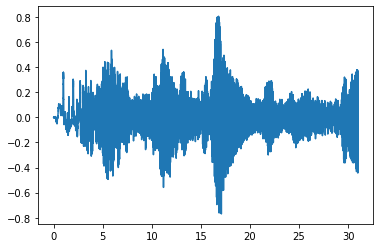

In [5]:
plt.plot(time, acc1)

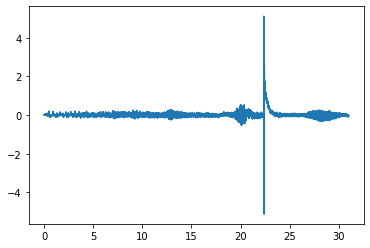

In [6]:
plt.plot(time, acc2)

In [7]:
sympy.divisors(acc1.shape[0])

[1,
 2,
 4,
 5,
 8,
 10,
 16,
 20,
 25,
 31,
 32,
 40,
 50,
 62,
 64,
 80,
 100,
 124,
 128,
 155,
 160,
 200,
 248,
 256,
 310,
 320,
 400,
 496,
 512,
 620,
 640,
 775,
 800,
 992,
 1024,
 1240,
 1280,
 1550,
 1600,
 1984,
 2480,
 2560,
 3100,
 3200,
 3968,
 4960,
 5120,
 6200,
 6400,
 7936,
 9920,
 12400,
 12800,
 15872,
 19840,
 24800,
 25600,
 31744,
 39680,
 49600,
 79360,
 99200,
 158720,
 198400,
 396800,
 793600]

In [9]:
# Fourierova transformacija posameznih segmentov
acc_split1 = np.array(np.split(acc1,50))  # array podsegmentov signala po 145
acc_split2 = np.array(np.split(acc2,50))
print(acc_split1.shape)
time_split = np.array(np.split(time,50))  # array podsegmentov časa po 145
N_split = time_split[0].shape[0]
print(N_split)

acc_f1 = np.fft.rfft(acc_split1)*2/N_split
acc_f2 = np.fft.rfft(acc_split2)*2/N_split

# vektor frekvenc
freq = np.fft.rfftfreq(N_split,dt)

(50, 15872)
15872


In [10]:
freq[-1] 

12799.98387096774

In [11]:
meja = 150  # omejimo frekevnce
ind_meja = np.where(freq > meja)[0][0]  # 333

acc_f1 = acc_f1[:, :ind_meja]
acc_f2 = acc_f2[:, :ind_meja]
freq = freq[:ind_meja]

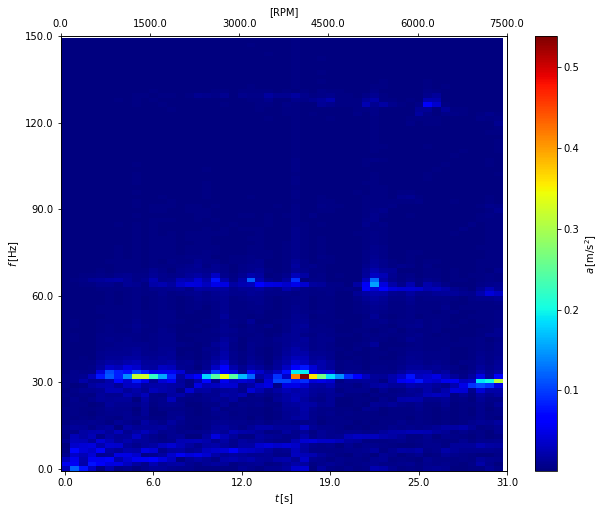

In [12]:
# linearna skala

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(np.abs(acc_f1).T, aspect='auto', cmap='jet', origin='lower')
fig.colorbar(im, label='$a\,[\\mathrm{m/s}^2]$')



div = 6
ax.set_ylabel('$f\,[\\mathrm{Hz}]$');
ax.set_yticks(np.linspace(0,len(freq),div));
ax.set_yticklabels(np.linspace(freq[0],freq[-1],div).round(0));

ax.set_xlabel('$t\,[\\mathrm{s}]$');
mean_time = np.mean(time_split,axis = 1)
ax.set_xticks(np.linspace(0,len(mean_time),div));
ax.set_xticklabels(np.linspace(mean_time[0],mean_time[-1],div).round(0));

# predpostavimo linearno naraščanje vrtilne hitrosti od 0-7500 rpm
ax2 = ax.twiny()
ax2.set_xlabel('[RPM]');
ax2.set_xticks(np.linspace(0,len(mean_time),div));
ax2.set_xticklabels(np.linspace(0,7500,div).round(0));

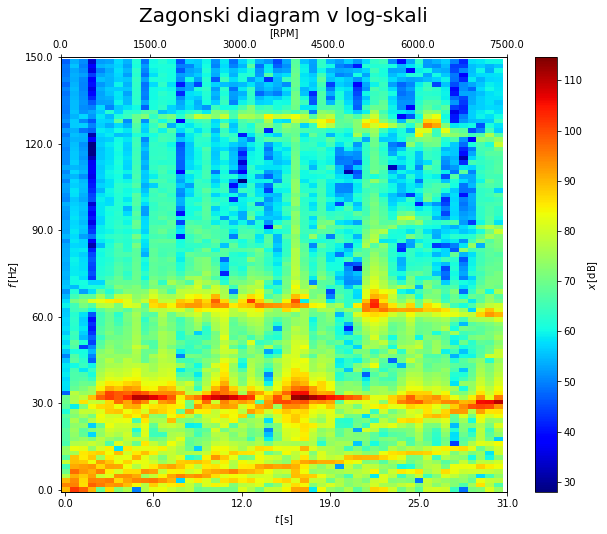

In [13]:
# logaritemska skala
%matplotlib inline

acc_f_dB = 20*np.log10(np.abs(acc_f1/10**-6))

fig, ax = plt.subplots(figsize=(10,8))

im = ax.imshow(np.abs(acc_f_dB).T, aspect='auto', cmap='jet', origin='lower')
fig.colorbar(im, label='$x\,[\\mathrm{dB}]$')

div = 6
ax.set_ylabel('$f\,[\\mathrm{Hz}]$');
ax.set_yticks(np.linspace(0,len(freq),div));
ax.set_yticklabels(np.linspace(freq[0],freq[-1],div).round(0));

ax.set_xlabel('$t\,[\\mathrm{s}]$');
mean_time = np.mean(time_split,axis = 1)
ax.set_xticks(np.linspace(0,len(mean_time),div));
ax.set_xticklabels(np.linspace(mean_time[0],mean_time[-1],div).round(0));

# predpostavimo linearno naraščanje vrtilne hitrosti od 0-7500 rpm
ax2 = ax.twiny()
ax2.set_xlabel('[RPM]');
ax2.set_xticks(np.linspace(0,len(mean_time),div));
ax2.set_xticklabels(np.linspace(0,7500,div).round(0));
plt.title('Zagonski diagram v log-skali',fontsize=20)
plt.savefig('zagonski2.png',dpi=300)

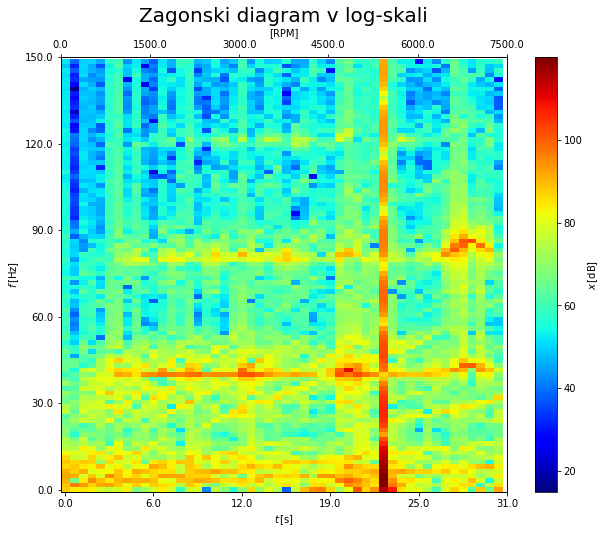

In [14]:
# logaritemska skala
%matplotlib inline

acc_f_dB = 20*np.log10(np.abs(acc_f2/10**-6))

fig, ax = plt.subplots(figsize=(10,8))

im = ax.imshow(np.abs(acc_f_dB).T, aspect='auto', cmap='jet', origin='lower')
fig.colorbar(im, label='$x\,[\\mathrm{dB}]$')

div = 6
ax.set_ylabel('$f\,[\\mathrm{Hz}]$');
ax.set_yticks(np.linspace(0,len(freq),div));
ax.set_yticklabels(np.linspace(freq[0],freq[-1],div).round(0));

ax.set_xlabel('$t\,[\\mathrm{s}]$');
mean_time = np.mean(time_split,axis = 1)
ax.set_xticks(np.linspace(0,len(mean_time),div));
ax.set_xticklabels(np.linspace(mean_time[0],mean_time[-1],div).round(0));

# predpostavimo linearno naraščanje vrtilne hitrosti od 0-7500 rpm
ax2 = ax.twiny()
ax2.set_xlabel('[RPM]');
ax2.set_xticks(np.linspace(0,len(mean_time),div));
ax2.set_xticklabels(np.linspace(0,7500,div).round(0));
plt.title('Zagonski diagram v log-skali',fontsize=20)
plt.savefig('zagonski2.png',dpi=300)

# Analitičen izračun

In [15]:
L=1260e-3 #m
m=52e-3 #kg
u=41.3e-3 #kg/m
Nj=230 #N
Nd=481.32 #N
r=0.0495 #m
n=1800 #obr/min
v=2*np.pi*r*n/60 #m/s

In [16]:
w0j=np.pi/L*(Nj-u*v**2)/((Nj*u)**0.5)
f0j=w0j/(2*np.pi) #rad/s
f0j #Hz

29.15046695058124

In [17]:
w0d=np.pi/L*(Nd-u*v**2)/((Nd*u)**0.5)
f0d=w0d/(2*np.pi) #rad/s
f0d #Hz

42.519188609560224